<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Mututation-rate-vs-prevalence" data-toc-modified-id="Mututation-rate-vs-prevalence-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mututation rate vs prevalence</a></span></li><li><span><a href="#Fitness-effect-vs-proportion-of-mCA-at-&gt;5%-cell-fraction" data-toc-modified-id="Fitness-effect-vs-proportion-of-mCA-at->5%-cell-fraction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitness effect vs proportion of mCA at &gt;5% cell fraction</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import pandas as pd
import zipfile

In [3]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [4]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [5]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'

# Import data

In [6]:
# Import inferred fitness effects and mutation rates
df_original = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs.txt', sep = '\t')
df_untrimmed = df_original[['mCA', 'N_single_mCA', 's', 'mu']].copy()
df_untrimmed = df_untrimmed.set_index('mCA')
s_mu_numbers = df_untrimmed.to_dict(orient = 'index')

In [7]:
# Import cell fractions
zf = zipfile.ZipFile('Data_files/Supplementary_data_annotated_cw.csv.zip') 
df = pd.read_csv(zf.open('Supplementary_data_annotated_cw.csv'))
df_single = df[df['total_mCAs']==1]
df_3plus = df_single[df_single['annotation']=='3+']
cell_fractions = [float(i) for i in df_3plus['CELL_FRAC'].tolist()]

# Functions

In [8]:
def proportion_greater_than_cell_fraction(mCA, df_single, cell_fraction_cutoff):
    df_mCA = df_single[df_single['annotation']==mCA]
    cell_fractions = [float(i) for i in df_mCA['CELL_FRAC'].tolist()]
    total_mCAs = len(cell_fractions)
    total_greater_cell_fraction = 0
    for i in cell_fractions:
        if i>cell_fraction_cutoff:
            total_greater_cell_fraction += 1
    proportion_greater = total_greater_cell_fraction/total_mCAs
    return proportion_greater

In [9]:
def proportion_greater_dictionary(cell_fraction_cutoff):
    cell_fraction_greater_dictionary = {}
    for mCA in s_mu_numbers.keys():
        total_mCA = s_mu_numbers[mCA]['N_single_mCA']
        if total_mCA>=8:
            proportion_above = proportion_greater_than_cell_fraction(mCA, df_single, cell_fraction_cutoff)
            cell_fraction_greater_dictionary[mCA]={'proportion': proportion_above, 's': float(s_mu_numbers[mCA]['s'])}

    return cell_fraction_greater_dictionary

# Mututation rate vs prevalence

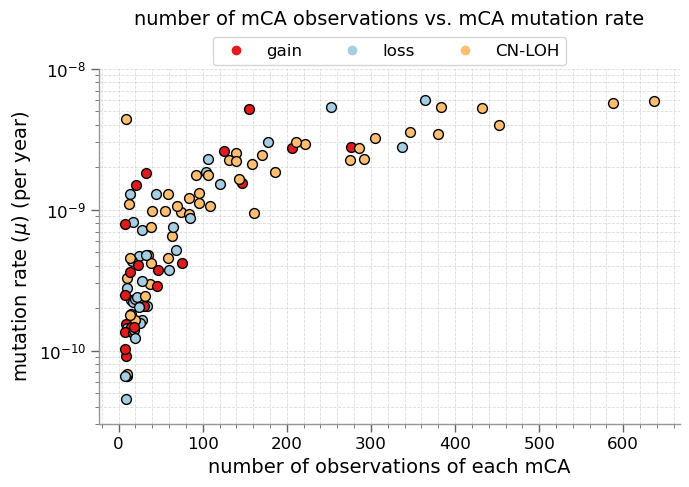

In [10]:
#Plot inferred mutation rate for each mCA vs. its prevalence
fig, ax1 = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)
fig.subplots_adjust(hspace=0.3, wspace = 0.3)
      
m_width = 1.5
c_size = 3
c_thick = 1.5
e_width = 1.5
    
mCA_colors = {'+': gain_color, '-': loss_color, '=':  neutral_color}

for k, v in s_mu_numbers.items():
    if v['N_single_mCA']>=8:
        ax1.scatter(v['N_single_mCA'], float(v['mu']), color = mCA_colors[k[-1]], s = 50, lw = 1, edgecolor = 'k', zorder = 2, alpha = 1)
    
ax1.tick_params(axis = 'both', which = 'major', color = grey4)
ax1.tick_params(axis = 'both', which='minor', color = grey4)
ax1.set_yscale('log')
ax1.set_ylim(3e-11, 1e-8)
ax1.set_title('number of mCA observations vs. mCA mutation rate', y = 1.1)
ax1.set_xlabel('number of observations of each mCA')
ax1.set_ylabel('mutation rate ($\u03BC$) (per year)')

ax1.grid(which="both", color = grey2)

custom_lines = [Line2D([0], [0], color=gain_color, lw=0, marker = 'o'),
                Line2D([0], [0], color=loss_color, lw=0, marker = 'o'),
                Line2D([0], [0], color=neutral_color, lw=0, marker = 'o')]

ax1.legend(custom_lines, ['gain', 'loss', 'CN-LOH'], ncol = 3, bbox_to_anchor=(0.5, 1.05), loc = 'center', frameon = 'yes', fancybox = 'yes')

plt.tight_layout(w_pad = 5)

# plt.savefig('Figures/mu_vs_mCA_observation.pdf')

plt.show()

# Fitness effect vs proportion of mCA at >5% cell fraction

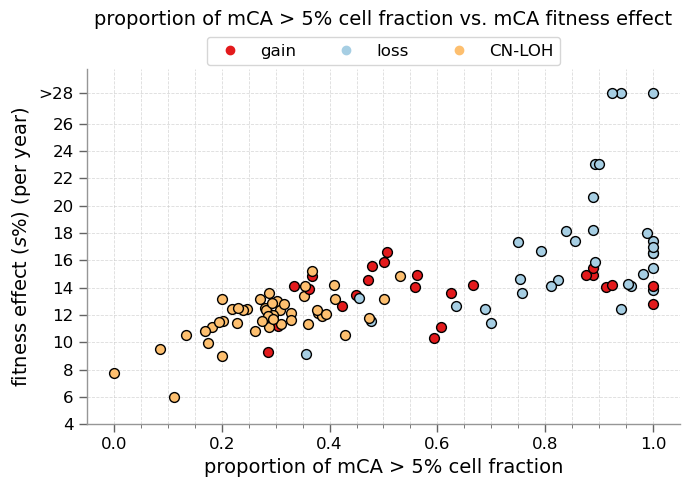

In [18]:
#Plot inferred fitness for each mCA vs. proportion of that mCA found at >5% cell fraction
fig, ax1 = plt.subplots(figsize=(7, 5))
    
## Plot the data ###    
m_width = 1.5
c_size = 3
c_thick = 1.5
e_width = 1.5
    
mCA_colors = {'+': gain_color, '-': loss_color, '=':  neutral_color}

cell_fract_cutoff1 = 0.05
dictionary1 = proportion_greater_dictionary(cell_fract_cutoff1)
for k, v in dictionary1.items():
    fitness = float(v['s'])*100
    if k[-1] == '-':
        if fitness >28:
            fitness = 28.25
    ax1.scatter(v['proportion'], fitness, color = mCA_colors[k[-1]], s = 50, lw = 1, edgecolor = 'k', zorder = 2, alpha = 1)

ax1.tick_params(axis = 'both', which = 'major', color = grey4)
ax1.tick_params(axis = 'both', which='minor', color = grey4)
ax1.set_ylim(4, 30)
ax1.set_ylabel('fitness effect ($s$%) (per year)')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.grid(which="both", color = grey2)
    
ax1.set_title('proportion of mCA > '+str(int(cell_fract_cutoff1*100))+'% cell fraction vs. mCA fitness effect', y = 1.1)
ax1.set_xlabel('proportion of mCA > '+str(int(cell_fract_cutoff1*100))+'% cell fraction')

custom_lines = [Line2D([0], [0], color=gain_color, lw=0, marker = 'o'),
                Line2D([0], [0], color=loss_color, lw=0, marker = 'o'),
                Line2D([0], [0], color=neutral_color, lw=0, marker = 'o')]

ax1.legend(custom_lines, ['gain', 'loss', 'CN-LOH'], ncol = 3, bbox_to_anchor=(0.5, 1.05), loc = 'center', frameon = 'yes', fancybox = 'yes')

y_major_ticks = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28.25]
y_major_tick_labels = ["4", "6", "8", "10", "12", "14", "16", "18", "20", "22", "24", "26", ">28"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels)

plt.tight_layout(w_pad = 5)

# plt.savefig('Figures/proportion_greater_cell_fraction_vs_mCA_fitness.pdf')

plt.show()